# Comparing salary reports of developers in India and the USA

# 1. Introduction: 

Every year, Stack overflow conducts a survey among its users predominantly in the Developer's community and then publishes analysis and insights. For this analysis, I have used the data from the latest survey in 2020 with over 65,000 respondents for the survey from over 180 countries and diverse demographics answering a wide range of questions ranging from behavioral, preferred technology, qualification among many others.

# 2. Business Understanding: 

Year after year, we see that US is one of the most sought after destination for work for Developers or aspiring developers in India. To explore more on the possible reasons for this trend, I am going to analze the Stack Overflow 2020 Annual Developer Survey and do a comparative study on salary of respondents from USA and India. In the process we will answer a few questions:

1. How different is the median salary in the USA and India?

2. What is the spread of salary distribution in USA and India?

3. How different are the gender pay gap in USA and India?

4. How are developers paid based on their qualification? 

5. How are developers paid based on the developer role?

6. What are the prohramming languages that pays the most in USA and India? 




# 2. Data Understanding


This involves some basic expoloratory analysis of data to get a better understanding about the data to evaluate them. 

###### Importing Libraries

In [48]:
#Import the required python libraries for data analysis. 

#Data Analysis
import numpy as np
import pandas as pd

#Data Visulaization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Modelling and AL
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#import ImputingValues as t
#import HowToBreakIntoTheField as t

In [49]:
#Import data from the source file
df = pd.read_csv('survey_results_public.csv')
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [50]:
#Select only those respondents who are Developers, Who were Developers, or those who code as part of their job
#Exclude Students or those who code primarily as hobby
df = df[df['MainBranch'].isin(["I am a developer by profession", 
                               "I am not primarily a developer, but I write code sometimes as part of my work",
                               "I used to be a developer by profession, but no longer am" ])]

### Data Exploration

In [51]:
# basic discriptive statistics
#df.info()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Respondent,53878.0,3.197871e+04,1.890313e+04,1.0,15528.25,31641.5,48350.75,6.563600e+04
Age,38895.0,3.214473e+01,9.098689e+00,1.0,26.00,30.0,36.00,2.790000e+02
CompTotal,34826.0,3.190464e+242,inf,0.0,20000.00,63000.0,125000.00,1.111111e+247
ConvertedComp,34756.0,1.037561e+05,2.268853e+05,0.0,24648.00,54049.0,95000.00,2.000000e+06
WorkWeekHrs,41151.0,4.078217e+01,1.781638e+01,1.0,40.00,40.0,44.00,4.750000e+02


In [52]:
df['ConvertedComp'].median()

54049.0

In [53]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am not primarily a developer, but I write code sometimes as part of my work     5502
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [54]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          23954
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12507
Some college/university study without earning a degree                                 5608
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2194
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1607
Associate degree (A.A., A.S., etc.)                                                    1558
Professional degree (JD, MD, etc.)                                                      711
I never completed any formal education                                                  339
Primary/elementary school                                                               266
Name: EdLevel, dtype: int64

In [55]:
df['YearsCode'].value_counts().head()

10    4199
5     3087
8     3002
6     2997
7     2934
Name: YearsCode, dtype: int64

In [56]:
df['DevType'].value_counts(normalize = True).head()

Developer, full-stack                                             0.090818
Developer, back-end                                               0.063451
Developer, back-end;Developer, front-end;Developer, full-stack    0.045847
Developer, back-end;Developer, full-stack                         0.030956
Developer, front-end                                              0.027410
Name: DevType, dtype: float64

<AxesSubplot:>

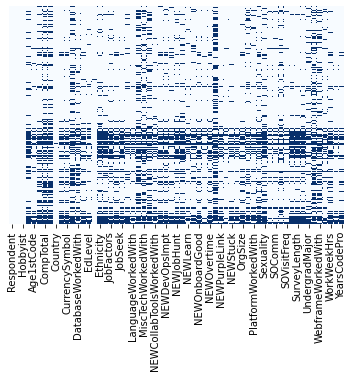

In [57]:
#Visualize the Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<AxesSubplot:>

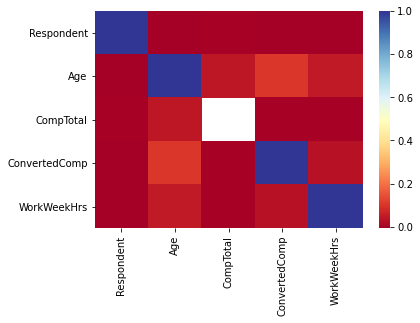

In [58]:
#Understand how each columns are correlated. 
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values , cmap='RdYlBu')

# 3. Data Preparation:

Here we modify data to a state such that it is fit for analysis. 

### Data Cleaning, Manipulation and renaming categories

In [59]:
#Recode categorical variabloes 

#There are 9 categories in EdLevel, reducing it to 5. 
df['EdLevel'].replace(["Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
                       "I never completed any formal education", "Primary/elementary school" ],
                         'High school or lesser',inplace = True)
df['EdLevel'].replace(["Bachelor’s degree (B.A., B.S., B.Eng., etc.)"],
                         'Bachelor’s degree',inplace = True)
df['EdLevel'].replace(["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"],
                         'Master’s degree',inplace = True)
df['EdLevel'].replace(["Some college/university study without earning a degree","Associate degree (A.A., A.S., etc.)" ],
                         'Some college/Associate degree/Unfinished degree',inplace = True)
df['EdLevel'].replace(["Professional degree (JD, MD, etc.)","Associate degree (A.A., A.S., etc.)" ],
                         'Master’s degree',inplace = True)
df['EdLevel'].replace(["Other doctoral degree (Ph.D., Ed.D., etc.)" ],
                         'Doctoral degree',inplace = True)
df['EdLevel'].value_counts()


#Converting categorical to Numeric
#Recoding 'Less than 1 year' to 1, and 'More than 50 years' to 50
df['YearsCode'] = df['YearsCode'].replace('Less than 1 year', '1')
df['YearsCode'] = df['YearsCode'].replace('More than 50 years', '50')
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors = 'coerce')


#Reducing the no of categories in gender. 
#recoding gender options other than Man and Women as LGBTQ+
df["Gender"].replace(["Non-binary, genderqueer, or gender non-conforming",
                       "Man;Non-binary, genderqueer, or gender non-conforming", 
                      "Woman;Non-binary, genderqueer, or gender non-conforming" ,"Woman;Man;Non-binary, genderqueer, or gender non-conforming" , 'Woman;Man'],
                         'LGBTQ+',inplace = True)

In [60]:
#Now we have lesser categories for each of these columns. 

print(df['EdLevel'].value_counts())
print(" ")
print(df["Gender"].value_counts())

Bachelor’s degree                                  23954
Master’s degree                                    13218
Some college/Associate degree/Unfinished degree     7166
High school or lesser                               2799
Doctoral degree                                     1607
Name: EdLevel, dtype: int64
 
Man       38969
Woman      3184
LGBTQ+      544
Name: Gender, dtype: int64


In [61]:
#Filter out the top 10 countries in terms of respondents and make a new dataframe.
df_top10 = df[df['Country'].isin(["United States","India", "United Kingdom","Germany","Canada",
              "France","Brazil","Netherlands","Poland","Australia"])]

#Create a seperate dataframe for respondents from India and US 
df_US_Ind = df[df['Country'].isin(["United States","India"])]
df_US_Ind['Country'].value_counts()


#For Our analysis, we are going to compare respondends from India and US
df_us = df_US_Ind[df_US_Ind['Country']== 'United States']
df_ind = df_US_Ind[df_US_Ind['Country']== 'India']


# 4. Data Analytics and Insights

### Countries with top 10 most respondents

Text(0, 0.5, '')

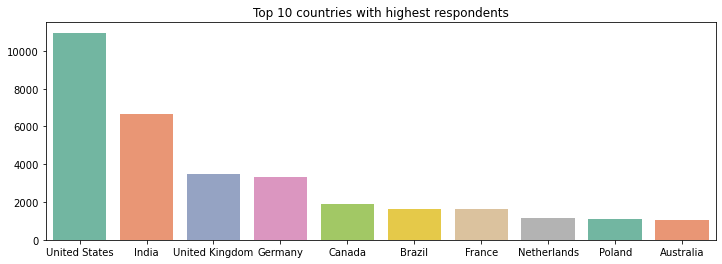

In [62]:
# Bar Chart to indicate the distribution of respondents per country
plt.figure(figsize=[12,4])
sns.countplot(x ="Country", data = df_top10, order = df_top10['Country'].value_counts().index , 
              palette = sns.color_palette("Set2", 10)).set_title("Top 10 countries with highest respondents")
print("")
plt.xlabel("")
plt.ylabel("")

In [63]:
#Propotion of respondends per country
df_P = df['Country'].value_counts()/(df.shape[0])
df_P = pd.DataFrame(df_P)
df_P = df_P.head(10)
print(df_P)

                 Country
United States   0.203515
India           0.123223
United Kingdom  0.064980
Germany         0.061806
Canada          0.034708
Brazil          0.030049
France          0.029901
Netherlands     0.021252
Poland          0.020008
Australia       0.019915


## 4.1: How different is the median salary in the USA and India?

In [64]:
#Calculate Median Income and Median years of coding experience

'''
Create a dataframe with the following columns:

   1. Country Name
   2. Total counts
   3. Median Salary
   4. Median years of coding experience.
   
For this, we will create individual dataframe for each of the columns and then merge 
into a single dataframe with all columns.

'''

aa = pd.DataFrame(df['Country'].value_counts())
aa.rename_axis('Country')
aa.rename(columns = {'Country': 'Pop'})
bb = pd.DataFrame(df.groupby(['Country'])['ConvertedComp'].median())
cc = pd.DataFrame(df.groupby(['Country'])['YearsCode'].median())
cc.reset_index(inplace = True)
dd =aa.merge(bb , left_on = aa.index, right_on = bb.index)
ff =cc.merge(dd , left_on = 'Country', right_on = 'key_0')

ff.dropna()

#Rename column names
ff = ff.rename(columns = {'ConvertedComp':'Median Income'})
ff = ff.rename(columns = {'Country_y':'No of respondents'})
ff = ff.rename(columns = {'YearsCode':'Years of coding experience'})
ff = ff.rename(columns = {'key_0':'Country List'})


ff['Country_x'] = ff[(ff['Country List']== 'India') | (ff['Country List']== 'United States')]['Country List']
ff['Country_x'] = ff['Country_x'].fillna('Other Countries')
ff = ff.rename(columns = {'Country_x':'Country'})

In [65]:
#Bubble plot on Median Income vs Median Years of experience 
import plotly.express as px
df_a = px.data.gapminder()
cc
fig = px.scatter(ff, x="Median Income", y="Years of coding experience",
                 size="No of respondents", color="Country",
                log_x=False,hover_name="Country List", size_max=90 , width=1700, height=500 )
fig.show()


In [66]:
df_us['ConvertedComp'].mean()

208826.49644259078

In [67]:
df_us.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Respondent,10965.0,2.973741e+04,2.027552e+04,5.0,8748.0,29555.0,48546.0,6.562900e+04
Age,8580.0,3.481085e+01,1.048568e+01,1.0,27.0,32.0,40.0,9.900000e+01
CompTotal,8171.0,1.359823e+243,inf,0.0,80000.0,110000.0,150000.0,1.111111e+247
ConvertedComp,8152.0,2.088265e+05,3.729250e+05,0.0,83000.0,115000.0,159625.0,2.000000e+06
WorkWeekHrs,9093.0,4.179240e+01,8.221370e+00,1.0,40.0,40.0,45.0,1.400000e+02
YearsCode,10409.0,1.680181e+01,1.130007e+01,1.0,8.0,14.0,23.0,5.000000e+01


In [68]:
df_ind.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Respondent,6639.0,3.340774e+04,1.837898e+04,7.0,16844.0,35798.0,47326.5,6.559000e+04
Age,3512.0,2.717198e+01,5.108106e+00,10.0,24.0,26.0,29.0,9.800000e+01
CompTotal,2681.0,3.729985e+32,1.931308e+34,0.0,38000.0,360000.0,1085000.0,1.000000e+36
ConvertedComp,2668.0,2.875127e+04,9.301753e+04,0.0,5196.0,10056.0,20100.0,1.800000e+06
WorkWeekHrs,4029.0,4.034525e+01,1.675223e+01,1.0,40.0,40.0,48.0,1.680000e+02
YearsCode,5458.0,8.635581e+00,5.009541e+00,1.0,5.0,8.0,11.0,5.000000e+01


#### Analysis:

 
We see a stark difference in the median Income of the USA and India. USA with median income of 115k USD has among the highest median income among all countries, while India is far behind with a median income of 10K USD. 

## 4.2: What is the spread of salary distribution in USA and India?

In [69]:
#Median Salary in India and US
print('Median Salary in India = ', df_ind['ConvertedComp'].median())
print('Median Salary in USA = ', df_us['ConvertedComp'].median())

Median Salary in India =  10056.0
Median Salary in USA =  115000.0


Text(0.5, 6.79999999999999, 'Annual Salary')

<Figure size 864x1440 with 0 Axes>

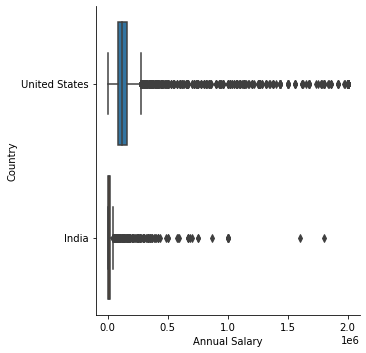

In [70]:
#Salary distribution in India and USA
#Box plot and Histogram to look at the salaru distribution

sal_US_Ind = df_US_Ind.dropna(subset = ['ConvertedComp'], axis = 0)

plt.figure(figsize=[12,20])
sns.catplot(data = sal_US_Ind, x = 'ConvertedComp', y = 'Country',  kind = 'box')
plt.xlabel("Annual Salary")

As you can see, there are lot of outlyer in both US and India. These need to be handlen in order to make a meaningful analysis

In [71]:
#To find outliers in Salary
Q1 = df_US_Ind['ConvertedComp'].quantile(0.25)
Q3 = df_US_Ind['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
min_value
max_value

292043.125

Text(0.5, 0, 'Salary(USD)')

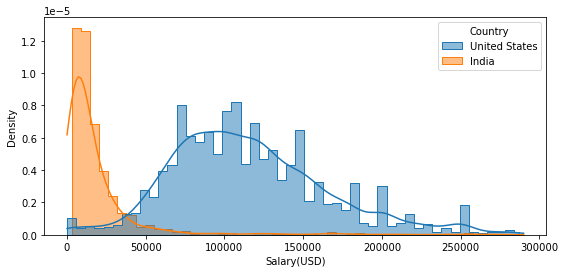

In [72]:
#Salary distribution in India and USA
#Remove outlyer for US and plot Histogram again

sal_US_Ind_o = df_US_Ind[df_US_Ind['ConvertedComp']< max_value ]

plt.figure(figsize=[9,4])
sal_hist = sns.histplot(data = sal_US_Ind_o, x = 'ConvertedComp', hue = 'Country', multiple = "dodge",element = 'step', 
                        bins = 50, kde = True ,stat = 'density' )
plt.xlabel("Salary(USD)")

Now lets Analyse Salary per Gender in India

In [73]:
#To find outliers in Indian Salary
Q1 = df_ind['ConvertedComp'].quantile(0.25)
Q3 = df_ind['ConvertedComp'].quantile(0.75)
IQR1 = Q3 - Q1
max_value1 = Q3 + 1.5 * IQR1
min_value1 = Q1 - 1.5 * IQR1
min_value1
#max_value1

-17160.0

Text(0.5, 0, 'Salary(USD)')

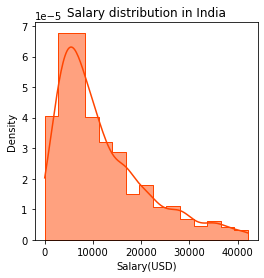

In [74]:
#Salary distribution in India only
#Remove outlyer for US and plot Histogram again

sal_ind = df_ind[df_ind['ConvertedComp']< max_value1]
plt.figure(figsize=[4,4])
sal_hist1 = sns.histplot(data = sal_ind, x = 'ConvertedComp',  multiple = "dodge",element = 'step', 
                        bins = 15, kde = True ,stat = 'density', color = 'orangered'  ).set_title("Salary distribution in India")
plt.xlabel("Salary(USD)")

#### Analysis:

We can see that the salary in USA is nearly normally distributed, where as in India the salary is heavily Right-Skewed. 

## 4.3. How different are the gender pay gap in USA and India?

###  1. Gender pay gap in India

In [75]:
#Drop Null values
sal_Ind_rm = df_ind.dropna(subset = ['ConvertedComp', 'Gender'], axis = 0)
sal_US_rm = df_us.dropna(subset = ['ConvertedComp', 'Gender'], axis = 0)

In [76]:
# including only Man and Woman in analysis. 
sal_Ind_rm = sal_Ind_rm[sal_Ind_rm['Gender'].isin(['Man','Woman'])]
#sns.histplot(data = sal_Ind_rm, x = 'ConvertedComp', hue = 'Gender',element = 'step', bins = 100 , kde = True )
#sns.catplot(data = sal_Ind_rm, x = 'ConvertedComp', y = 'Gender', aspect = 4 , kind = 'box')

In [77]:
#Calculate median Income in India for Man and Woman. 
sal_Ind_rm_df = pd.DataFrame(sal_Ind_rm.groupby(['Gender'])['ConvertedComp'].median())
sal_Ind_rm_df.reset_index(inplace = True)
sal_Ind_rm_df = sal_Ind_rm_df.rename(columns = {'ConvertedComp':'Median Income'})
sal_Ind_rm_df  = sal_Ind_rm_df.sort_values(by = 'Median Income', ascending = True)
sal_Ind_rm_df

,Gender,Median Income
1,Woman,7006.5
0,Man,10471.0


In [78]:
#Calculate Gender pay gap
((10471-7006.5)/7006.5)*100

49.446942125169485

Text(0.5, 0, '')

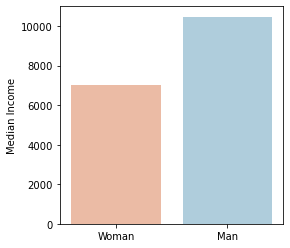

In [79]:
# Bar Chart to indicate median salary for Mena and Woman
plt.figure(figsize=[4,4])
sns.barplot( x = 'Gender' , y = 'Median Income', data = sal_Ind_rm_df , palette = sns.color_palette("RdBu", 2)  )
plt.xlabel("")

### 2. Gender pay gap in USA

In [80]:
sal_US_rm = sal_US_rm[sal_US_rm['Gender'].isin(['Man','Woman'])]

In [81]:
#Calculate median Income in the USA for Man and Woman. 
sal_US_rm_df = pd.DataFrame(sal_US_rm.groupby(['Gender'])['ConvertedComp'].median())
sal_US_rm_df.reset_index(inplace = True)
sal_US_rm_df = sal_US_rm_df.rename(columns = {'ConvertedComp':'Median Income'})
sal_US_rm_df = sal_US_rm_df.sort_values(by = 'Median Income', ascending = True)
sal_US_rm_df 

,Gender,Median Income
1,Woman,103000.0
0,Man,116000.0


In [82]:
((116000-103000)/103000)*100

12.62135922330097

Text(0.5, 0, '')

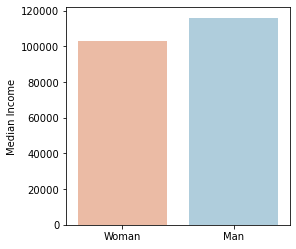

In [83]:
# Bar Chart to indicate the distribution of respondents per country
plt.figure(figsize=[4,4])
sns.barplot( x = 'Gender' , y = 'Median Income', data = sal_US_rm_df , palette = sns.color_palette("RdBu", 2)  )
plt.xlabel("")

In [84]:
df_us['Gender'].value_counts()

Man       8164
Woman      944
LGBTQ+     186
Name: Gender, dtype: int64

#### Analysis:

In the USA, Men eard 12% more than Women, while in India Men earn around 49% more than wome. 

## 4.4. How are developers paid based on their qualification? 

### 1. United States

In [85]:
#No of respondents for each education level in USA
df_us['EdLevel'].value_counts()

Bachelor’s degree                                  5902
Master’s degree                                    2106
Some college/Associate degree/Unfinished degree    1707
Doctoral degree                                     403
High school or lesser                               327
Name: EdLevel, dtype: int64

Text(0, 0.5, '')

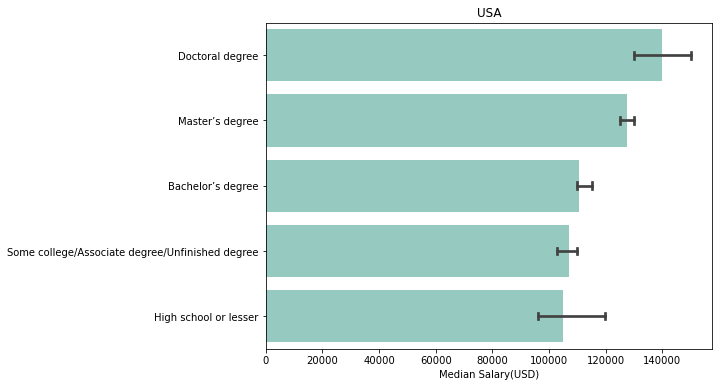

In [86]:
#Plot median salary per education level: Plot 1
from numpy import median
plt.figure(figsize=[8,6])
sns.barplot( y = 'EdLevel' , x = 'ConvertedComp', data = df_us ,
            palette = sns.color_palette("Set3", 1) ,estimator= median , capsize=.1 , 
            order = ["Doctoral degree", "Master’s degree", "Bachelor’s degree",
                     "Some college/Associate degree/Unfinished degree","High school or lesser"]).set_title("USA")
print("")
plt.xlabel("Median Salary(USD)")
plt.ylabel("")

Note: the lines in the bar graph indicates margin of error for each category. 

### 2. India

In [87]:
#No of respondents for each education level in India
df_ind['EdLevel'].value_counts()

Bachelor’s degree                                  3842
Master’s degree                                    1375
Some college/Associate degree/Unfinished degree     141
High school or lesser                               114
Doctoral degree                                      16
Name: EdLevel, dtype: int64

Text(0.5, 0, 'Median Salary(USD)')

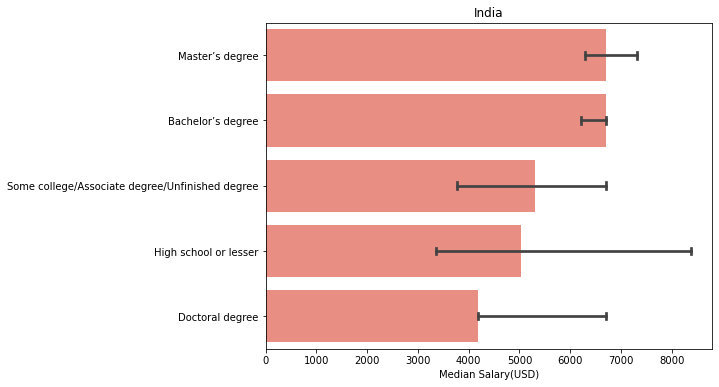

In [88]:
#The data in India has a few extreme outlyer. Thus only including those with salary lesser than 15000 for the analysis.

sal_ind = df_ind[df_ind['ConvertedComp']< 15000]
sal_ind = sal_ind.sort_values(by = 'ConvertedComp', ascending = False)

#Plot median salary per education level(India): Plot 1

plt.figure(figsize=[8,6])
sns.barplot( y = 'EdLevel' , x = 'ConvertedComp', data = sal_ind ,color = 'salmon' ,
            estimator= median , capsize=.1 ).set_title("India")
plt.ylabel("")
plt.xlabel("Median Salary(USD)")

Note: Median salary for Hight School and Doctoral degree is very high. Thus sould be careful before drawing any inference from them. 

## 4.5. How are developers paid based on the developer role?

In [89]:
#No of respondents who selected each of teh DevTypes. 

#DevType was a multiselect variable, where respondents could select multiple options. 
#Applying methods so that we can get counts for each option selected. 
python_bool = df['DevType'].str.split(';', expand = True)
python_bool.head()
python_bool.stack().value_counts()

Developer, back-end                              26182
Developer, full-stack                            26102
Developer, front-end                             17345
Developer, desktop or enterprise applications    11329
Developer, mobile                                 8930
DevOps specialist                                 5870
Database administrator                            5438
System administrator                              4864
Designer                                          4810
Developer, embedded applications or devices       4541
Developer, QA or test                             3760
Data or business analyst                          3740
Data scientist or machine learning specialist     3711
Engineer, data                                    3559
Academic researcher                               3212
Educator                                          2693
Engineering manager                               2648
Developer, game or graphics                       2492
Product ma

In [90]:
#Store all the DevType in a list.  

DevType_Values = ["Academic researcher","Data or business analyst","Data scientist or machine learning specialist",
  "Database administrator","Designer","Developer, back-end","Developer, desktop or enterprise applications",
  "Developer, embedded applications or devices","Developer, front-end","Developer, full-stack","Developer, game or graphics",
  "Developer, mobile","Developer, QA or test","DevOps specialist","Educator","Engineer, data",
  "Engineer, site reliability","Engineering manager","Marketing or sales professional","Product manager",
  "Scientist","Senior executive/VP","System administrator"]

### 1. USA

In [91]:
#Drop Null values
df_us1 = df_us.dropna(subset = ['ConvertedComp', 'DevType'], axis = 0)

In [92]:
#To calculate median Salary for each DevType


'''
Use for loop to iterate through each DevType from the list DevType_Values
Store all the rows that match the DevType in a dataframe.
Find the median salary of the respendents in the dataframe and store it in a list.

This way, we will have a list of median salary for each of the DevType

Note: this code needs to be improved further. 
'''

#Empty lists
my_list11 = []
my_list22 = []

#For loop to iterate through each Devtypes in DevType_Values list
for j in  DevType_Values:
    
    #Creat dataframe to store all rows which contains a particular DevType
    abcd = df_us1[df_us1['DevType'].str.contains(j)]
    #Find the median salary of the dataframe for the DevType and store as a list
    my_list = abcd['ConvertedComp'].median()
    #Append the list with median salary, for each DevType in DevType_Values
    my_list11.append(my_list)
    #Append the individual DevType to another list.
    my_list22.append(j)
    
#Convert list to a Dataframe
df_my_list11 = pd.DataFrame(my_list11, columns = ['Salary'])
df_my_list22 = pd.DataFrame(my_list22, columns = ['Job type'])

#Join the DevType list and the corresponding MEdian for each devtype to a single dataframe. 
df_my_list11['Job Type'] = df_my_list22
df_my_list11
df_my_list11 = df_my_list11.sort_values(by = 'Salary', ascending = False)

In [94]:
def split_the_multipunch(data_frame, column_name1 , column_name2 , value):
    #Empty lists
    my_list1 = []
    my_list2 = []
    
    for i in  value:
        data = data_frame[data_frame[column_name1].str.contains(i)]
        my_list = data[column_name2].median()
        my_list1.append(my_list)
        my_list2.append(i)
        
    #Convert list to a Dataframe
    df_my_list1 = pd.DataFrame(my_list1, columns = [column_name2])
    df_my_list2 = pd.DataFrame(my_list2, columns = [column_name1])
        
    df_my_list1[column_name1] = df_my_list2
    df_my_list1 = df_my_list1.sort_values(by = column_name2, ascending = False)
        
    return df_my_list1       

In [95]:
median_sal = split_the_multipunch(df_us1 ,'DevType' , 'ConvertedComp' ,  DevType_Values)
median_sal

,ConvertedComp,DevType
21,163500.0,Senior executive/VP
17,151500.0,Engineering manager
16,140000.0,"Engineer, site reliability"
15,125000.0,"Engineer, data"
2,125000.0,Data scientist or machine learning specialist
19,125000.0,Product manager
13,125000.0,DevOps specialist
11,120000.0,"Developer, mobile"
20,120000.0,Scientist
5,120000.0,"Developer, back-end"


Text(0, 0.5, '')

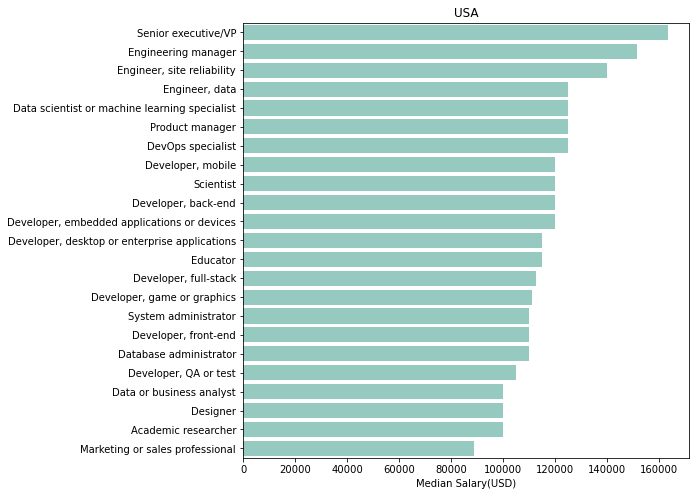

In [93]:
# Bar Chart to indicate median salary for each DevType
plt.figure(figsize=[8,8])
sns.barplot( y = 'Job Type' , x = 'Salary', data = df_my_list11 , palette = sns.color_palette("Set3", 1) ).set_title("USA")
plt.xlabel("Median Salary(USD)")
plt.ylabel("")

### 2. India

In [45]:
#To calculate median Salary for each DevType

df_ind1 = df_ind.dropna(subset = ['ConvertedComp', 'DevType'], axis = 0)

my_list1 = []
my_list2 = []
for i in  DevType_Values:
    abc = df_ind1[df_ind1['DevType'].str.contains(i)]
    my_list = abc['ConvertedComp'].median()
    my_list1.append(my_list)
    my_list2.append(i)

df_my_list1 = pd.DataFrame(my_list1, columns = ['Salary'])
df_my_list2 = pd.DataFrame(my_list2, columns = ['Job type'])
df_my_list1['Job Type'] = df_my_list2
df_my_list1 = df_my_list1.sort_values(by = 'Salary', ascending = False)

Text(0, 0.5, '')

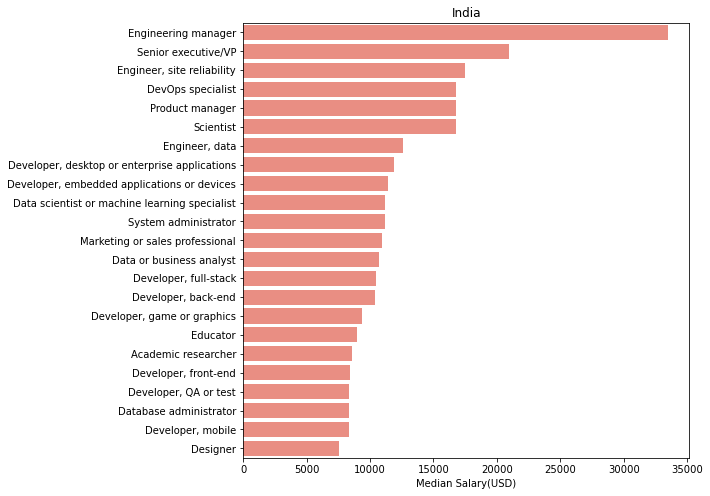

In [46]:
# Bar Chart to indicate median salary for each DevType
plt.figure(figsize=[8,8])
sns.barplot( y = 'Job Type' , x = 'Salary', data = df_my_list1 , color = 'salmon' ).set_title("India")
plt.xlabel("Median Salary(USD)")
plt.ylabel("")

## 4.6. What are the programming languages that pays the most in USA and India? 

In [47]:
#To get Count of each programming language in 'LanguageWorkedWith' column in USA

python_bool1 = df_us['LanguageWorkedWith'].str.split(';', expand = True)
python_bool1 = python_bool1.stack().value_counts()
python_bool1 = pd.DataFrame(python_bool1)
python_bool1.reset_index(inplace = True)
python_bool1

,index,0
0,JavaScript,7307
1,HTML/CSS,6522
2,SQL,6195
3,Python,5060
4,Bash/Shell/PowerShell,4822
5,C#,3549
6,Java,3432
7,TypeScript,2909
8,C++,2036
9,PHP,1806


In [48]:
#To get Count of each programming language in 'LanguageWorkedWith' column

python_bool2 = df_ind['LanguageWorkedWith'].str.split(';', expand = True)
python_bool2 = python_bool2.stack().value_counts()
python_bool2 = pd.DataFrame(python_bool2)
python_bool2.reset_index(inplace = True)
python_bool2

,index,0
0,JavaScript,3661
1,HTML/CSS,3300
2,SQL,2700
3,Java,2437
4,Python,1812
5,PHP,1527
6,C,1402
7,TypeScript,1294
8,C++,1207
9,C#,1104


In [49]:
#Store the Column with all the Progremming language to a list
python_bool1 = python_bool1['index'].tolist()

In [50]:
#Store all the language in a list
python_bool1 = ['JavaScript',
'HTML/CSS',
'SQL',
'Python',
'Java;',
'Bash/Shell/PowerShell',
'C#',
'TypeScript',
'PHP',
 'C;',
  'C+',              
 'Go',
 'Kotlin',
 'Ruby',
 'VBA',
 'Swift',
 'R;',
 'Assembly',
 'Rust',
 'Objective-C',
 'Scala',
 'Dart',
 'Perl',
 'Haskell',
 'Julia']

## 1. USA

In [51]:
#Drop null values
df_us2 = df_us.dropna(subset = ['ConvertedComp', 'LanguageWorkedWith'], axis = 0)

In [52]:
#To calculate median Salary for each LanguageWorkedWith
my_lista = []
my_listb = []
for k in  python_bool1:
    abcd = df_us2[df_us2['LanguageWorkedWith'].str.contains(k)]
    my_list = abcd['ConvertedComp'].median()
    my_lista.append(my_list)
    my_listb.append(k)

df_my_lista = pd.DataFrame(my_lista, columns = ['Salary'])
df_my_listb = pd.DataFrame(my_listb, columns = ['Programming Language'])
df_my_lista['Programming Language'] = df_my_listb
df_my_lista
df_my_lista = df_my_lista.sort_values(by = 'Salary', ascending = False)
df_my_lista.head()

#abc = df_ind[df_ind['DevType'].str.contains(i)]

,Salary,Programming Language
20,150000.0,Scala
11,140000.0,Go
19,135000.0,Objective-C
12,130000.0,Kotlin
22,130000.0,Perl


Text(0, 0.5, '')

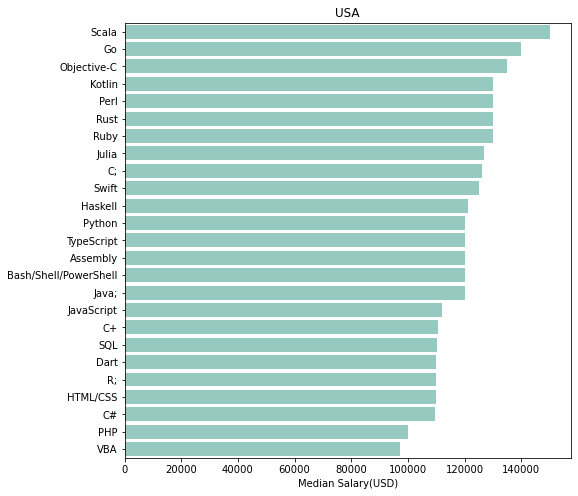

In [53]:
# Bar Chart to indicate median salary for each Programming Language worked with
plt.figure(figsize=[8,8])
sns.barplot( y = 'Programming Language' , x = 'Salary', data = df_my_lista , 
            palette = sns.color_palette("Set3", 1)).set_title("USA")
plt.xlabel("Median Salary(USD)")
plt.ylabel("")

In [54]:
df_ind2 = df_ind.dropna(subset = ['ConvertedComp', 'LanguageWorkedWith'], axis = 0)

In [55]:
#To calculate median Salary for each LanguageWorkedWith
my_listaa = []
my_listbb = []
for l in  python_bool1:
    abcde = df_ind2[df_ind2['LanguageWorkedWith'].str.contains(l)]
    my_list1 = abcde['ConvertedComp'].median()
    my_listaa.append(my_list1)
    my_listbb.append(l)

df_my_listaa = pd.DataFrame(my_listaa, columns = ['Salary'])
df_my_listbb = pd.DataFrame(my_listbb, columns = ['Programming Language'])
df_my_listaa['Programming Language'] = df_my_listbb
df_my_listaa
df_my_listaa = df_my_listaa.sort_values(by = 'Salary', ascending = False)
df_my_listaa.head()

#abc = df_ind[df_ind['DevType'].str.contains(i)]

,Salary,Programming Language
18,23460.0,Rust
20,20943.0,Scala
22,18848.0,Perl
11,16877.0,Go
13,16754.0,Ruby


NameError: name 'df_us1' is not defined

Text(0, 0.5, '')

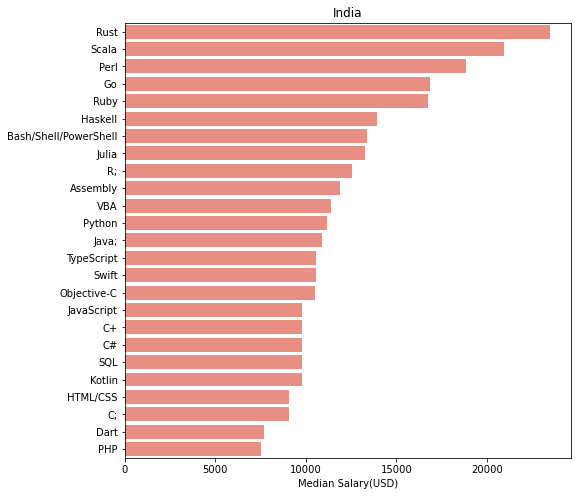

In [56]:
# Bar Chart to indicate median salary for each Programming Language worked with
plt.figure(figsize=[8,8])
sns.barplot( y = 'Programming Language' , x = 'Salary', data = df_my_listaa , 
            color = 'salmon').set_title("India")
plt.xlabel("Median Salary(USD)")
plt.ylabel("")

From these factors we can see that why many Indian developers move to USA for work. Also on the other hand, we can also see why many US companies outsource their Software development to India. 

## 5.  Model Building

In [57]:
#Loading functions
import statsmodels.api as sm
import statsmodels.formula.api as smf

### OLS regression model for USA to predict salary

In [58]:
#Fit the model
mod = smf.ols(formula ='ConvertedComp  ~   Hobbyist + Age + EdLevel + Gender + JobSat + OpSys + OrgSize + YearsCode + WorkWeekHrs', 
              data=df_us)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          ConvertedComp   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.633
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.49e-09
Time:                        23:34:07   Log-Likelihood:                -96977.
No. Observations:                6819   AIC:                         1.940e+05
Df Residuals:                    6793   BIC:                         1.942e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [59]:
### OLS regression model for India to predict salary

In [60]:
mod = smf.ols(formula ='ConvertedComp  ~     Gender + Age + OpSys + OrgSize + WorkWeekHrs' , data=df_ind)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          ConvertedComp   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.400
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.24e-16
Time:                        23:34:08   Log-Likelihood:                -25772.
No. Observations:                2054   AIC:                         5.158e+04
Df Residuals:                    2038   BIC:                         5.167e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

####  Analysis:

Both the regression models to predict salary in USA and India have a bery low R Square value, meaning the variables are not good at explaining the variablility in the Salary. Thus we need to work more to find a better model. 

# 6.  Conclusion and Inferences:


1. How different is the median salary in the USA and India?

    We see a stark difference in the median Income of the USA and India. USA with median income of 115k USD has among the highest median income among all countries, while India is far behind with a median income of 10K USD.


2. What is the spread of salary distribution in USA and India?

    We can see that the salary in USA is nearly normally distributed, where as in India the salary is heavily Right-Skewed. This means ther eare far more people payed lesser in India. 


3. How different are the gender pay gap in USA and India?

    In the USA, Men eard 12% more than Women, while in India Men earn around 49% more than Women.The gender pay gap seem sto be much more stark in India than in USA. 


4. How are developers paid based on their qualification? 

    In the USA, PhD holders, followed by Master's and then Bachelor's are payed high. Where as in India, Master's are paid highest followed by Bachelor's degree holders, however PhD holders seem to be paid among the least. 
Note: The margin of error for median salary of PhD holders in India is quite high, because very less No of respondents in India were PhD holders to be able to draw inferance. 


5. How are developers paid based on the developer role?

    Based on the survey, In both India and the US, Engineering Manager and Senior executive/VPs are among the highest-paid. However, in India, Senior executives/VPs are only paid a distinct second to the Engineering managers. 
    
    Data scientists and Data engineers are among the highest-paid in the USA, while in India they are not paid as much as compared to other roles within India. 

    Also, in India, those in Marketing and sales have better salaries compared to many other hard-core tech roles in India such as Full-stack/backend developer or database admin. Whereas in the US, Marketing and sales professionals are among the least paid. 

    The most notable difference in salary patterns in India in comparison to the USA is that there is a substantial pay gap between the higher paid roles and the least paid roles. For example Designers, Mobile developers, and QA testers are paid about 6k yearly, whereas Engineering managers are paid over 30k, and SREs and DevOps specialists are paid about 20k yearly. Whereas in the case of the USA, most roles have a median annual salary over 100k


6. What are the programming languages that pays the most in USA and India? 

    Developers who know Scala are among the highest paid in both the USA and India, based on the survey. Developers who knew Rust were the highest paid in India, followed by Scala and Pearl. 
    
    In both India and the USA, programming languages such as Rust, Pearl, Ruby had relatively less number of respondents who knew them, however are among the highest-paid. 
    
    Another interesting observation is that VBA has the least median salary in the USA while in India they are paid relatively higher in India. On the contrary, developers with experience in Kotlin are among the lesser paid in India while in the USA they are paid higher when compared to other languages in the USA. 
    
    In both India and the USA, developers with experience in PHP are among the least paid.